# Instructions
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

- Import the necessary libraries if you are starting a new notebook.

In [8]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

- Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [9]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [10]:
customer_df.columns = [col.replace(" ", "_").lower() for col in customer_df]

- What should we do with the customer_id column? R: Eliminarla

In [11]:
customer_df = customer_df.drop("customer", axis=1)
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


- Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg:
- numerical_df = customer_df.select_dtypes()
- categorical_df = customer_df.select_dtypes()

In [12]:
numerical_df = customer_df.select_dtypes(include = np.number)
categorical_df = customer_df.select_dtypes(include="object")

- Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

In [13]:
categorical_df

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


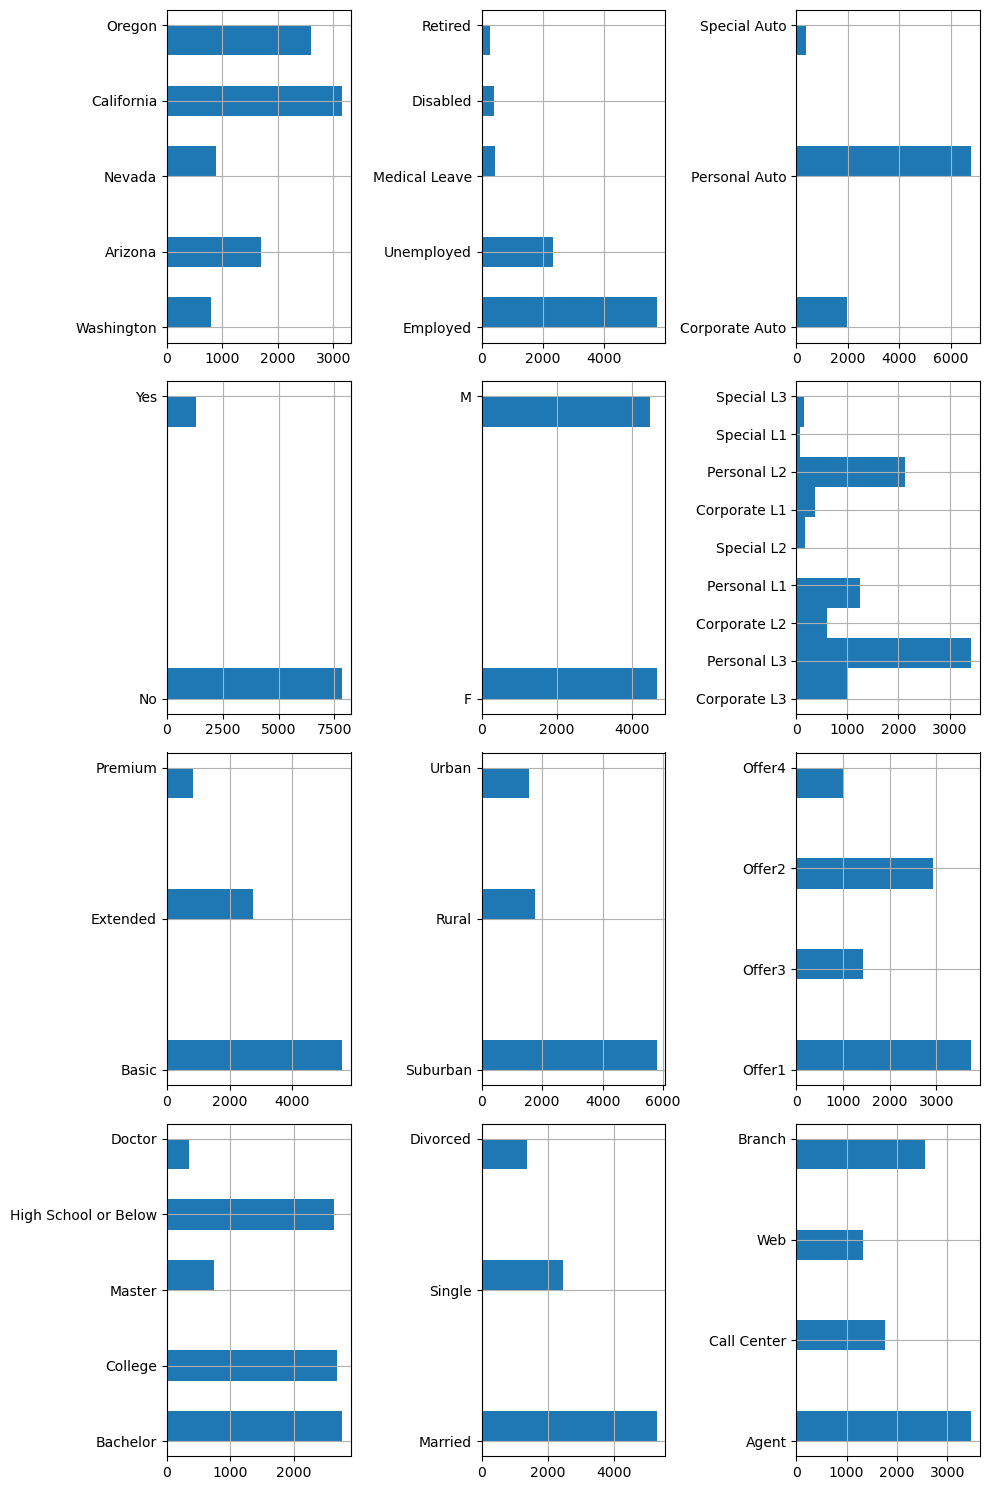

In [44]:

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 15))

categorical_df['state'].hist(ax=axs[0, 0], orientation="horizontal")
categorical_df['response'].hist(ax=axs[1, 0], orientation="horizontal")
categorical_df['coverage'].hist(ax=axs[2, 0], orientation="horizontal")
categorical_df['education'].hist(ax=axs[3, 0], orientation="horizontal")
categorical_df['employmentstatus'].hist(ax=axs[0, 1], orientation="horizontal")
categorical_df['gender'].hist(ax=axs[1, 1], orientation="horizontal")
categorical_df['location_code'].hist(ax=axs[2, 1], orientation="horizontal")
categorical_df['marital_status'].hist(ax=axs[3, 1], orientation="horizontal")
categorical_df['policy_type'].hist(ax=axs[0, 2], orientation="horizontal")
categorical_df['policy'].hist(ax=axs[1, 2], orientation="horizontal")
categorical_df['renew_offer_type'].hist(ax=axs[2, 2], orientation="horizontal")
categorical_df['sales_channel'].hist(ax=axs[3, 2], orientation="horizontal")

plt.tight_layout()
plt.show()

- For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [24]:
100*categorical_df['state'].value_counts()/len(categorical_df['state'])

California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

In [25]:
100*categorical_df['response'].value_counts()/len(categorical_df['response'])

No     85.679877
Yes    14.320123
Name: response, dtype: float64

In [26]:
100*categorical_df['coverage'].value_counts()/len(categorical_df['coverage'])

Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

In [27]:
100*categorical_df['education'].value_counts()/len(categorical_df['education'])

Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

In [28]:
100*categorical_df['employmentstatus'].value_counts()/len(categorical_df['employmentstatus'])

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: employmentstatus, dtype: float64

In [29]:
100*categorical_df['gender'].value_counts()/len(categorical_df['gender'])

F    50.996278
M    49.003722
Name: gender, dtype: float64

In [30]:
100*categorical_df['location_code'].value_counts()/len(categorical_df['location_code'])

Suburban    63.269104
Rural       19.410992
Urban       17.319904
Name: location_code, dtype: float64

In [31]:
100*categorical_df['marital_status'].value_counts()/len(categorical_df['marital_status'])

Married     58.003065
Single      27.008977
Divorced    14.987957
Name: marital_status, dtype: float64

In [32]:
100*categorical_df['policy_type'].value_counts()/len(categorical_df['policy_type'])

Personal Auto     74.315743
Corporate Auto    21.545873
Special Auto       4.138384
Name: policy_type, dtype: float64

In [33]:
100*categorical_df['policy'].value_counts()/len(categorical_df['policy'])

Personal L3     37.508211
Personal L2     23.231881
Personal L1     13.575651
Corporate L3    11.101379
Corporate L2     6.514123
Corporate L1     3.930370
Special L2       1.795489
Special L3       1.620320
Special L1       0.722575
Name: policy, dtype: float64

In [34]:
100*categorical_df['renew_offer_type'].value_counts()/len(categorical_df['renew_offer_type'])

Offer1    41.077294
Offer2    32.034158
Offer3    15.677688
Offer4    11.210861
Name: renew_offer_type, dtype: float64

In [35]:
100*categorical_df['sales_channel'].value_counts()/len(categorical_df['sales_channel'])

Agent          38.066564
Branch         28.103788
Call Center    19.323407
Web            14.506240
Name: sales_channel, dtype: float64

In [36]:
100*categorical_df['vehicle_class'].value_counts()/len(categorical_df['vehicle_class'])

Four-Door Car    50.591198
Two-Door Car     20.648128
SUV              19.662798
Sports Car        5.298883
Luxury SUV        2.014451
Luxury Car        1.784541
Name: vehicle_class, dtype: float64

In [37]:
100*categorical_df['vehicle_size'].value_counts()/len(categorical_df['vehicle_size'])

Medsize    70.330633
Small      19.312459
Large      10.356908
Name: vehicle_size, dtype: float64